**The following is the code and explanation for Q1. that pertains to plotting no  multiple repeats of 20 bernoulli trials of a coin toss.**

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap

In [ ]:

def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0]):

    repeatIndex = 0
    observation = np.ones((numRepeatsOfExp, numTrialsInAnExp))
    #print(observation)

    observation = randomNumGen.random((numRepeatsOfExp, numTrialsInAnExp))

    index_ge1 = np.less_equal(observation, bernoulliParam_p)

    observation[index_ge1] = profitLoss[0]
    observation[np.invert(index_ge1)] = profitLoss[1]


    return observation



In [ ]:
def aBinomialExperiment(randomNumGen, binomialParam_n=5, binomialParam_p=0.5, numberOfBinomialExperiments = 1, profitLoss_Bern = [1,0]):

    outcomesOfBernTrails = aBernoulliExperiment(randomNumGen, bernoulliParam_p=binomialParam_p, numRepeatsOfExp = numberOfBinomialExperiments, numTrialsInAnExp = binomialParam_n, profitLoss = profitLoss_Bern)

    #print(outcomesOfBernTrails, outcomesOfBernTrails.shape)

    outcomeOfBinomialExp = np.sum(outcomesOfBernTrails, axis = 1)
    #.reshape((numberOfBinomialExperiments,1)) #get a column vector

    #print(outcomeOfBinomialExp, outcomeOfBinomialExp.shape)

    return outcomeOfBinomialExp

In [ ]:
def toss_coin(randomNumGen, numTrials=20, bernoulliParam_p=0.2):
    outcomes = randomNumGen.random(size=numTrials) <= bernoulliParam_p
    return outcomes.astype(int)

This function inputs a returns an intger array containing results from 20 bernoulli trials with p = 0.2. If heads, then value is stored as 1 otherwise 0.

In [ ]:
def experiment_repeats(randomNumGen, numRepeats=5, numTrials=20, bernoulliParam_p=0.2):
    outcomes = []
    for _ in range(numRepeats):
        outcomes.append(toss_coin(randomNumGen, numTrials, bernoulliParam_p))
    return np.array(outcomes)

This function performs different repetitions of the expereiment, if no number of repetition is provided then by default it provides an array containing arrays of outcome for 20 bernoulli trials.

In [ ]:
def calculate_total_ones(outcomes):
    return np.sum(outcomes, axis=1)

the returns the sum of all the outcomes for 20 trials

In [ ]:
def plot_outcomes(outcomes, title):
    numTrials = len(outcomes[0])
    numRepeats = len(outcomes)
    trial_numbers = np.arange(1, numTrials + 1)
    for i, outcome in enumerate(outcomes):
        plt.step(trial_numbers, outcome, where='post', label=f'Repeat {i+1}')
    plt.xlabel('Trial Number')
    plt.ylabel('Outcome (1 for Head, 0 for Tail)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

this specific function is used to plot all the values in the outcomes array for y axis containing the the outcome, either as 1 or 0 and x axis containing the trial no.

In [ ]:
def plot_histogram(data, ylabel, title):
    plt.hist(data, bins=np.arange(np.max(data) + 2) - 0.5, density=True, alpha=0.75)
    plt.xlabel('Number of Ones')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

this is used to plot the histogram..

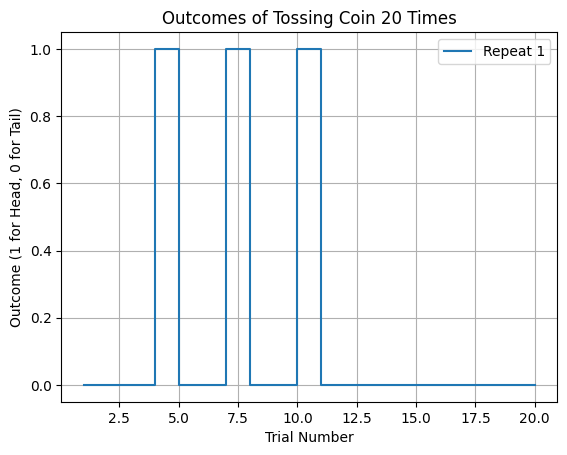

In [ ]:
# (a) Toss the coin 20 times and plot the outcomes against the trial number
randomNumGen = np.random.default_rng(1236)
outcomes_a = toss_coin(randomNumGen)
plot_outcomes([outcomes_a], 'Outcomes of Tossing Coin 20 Times')

We can see in this graph that in 20 trials,all trials that resulted in heads tosses produced Heads as its results.

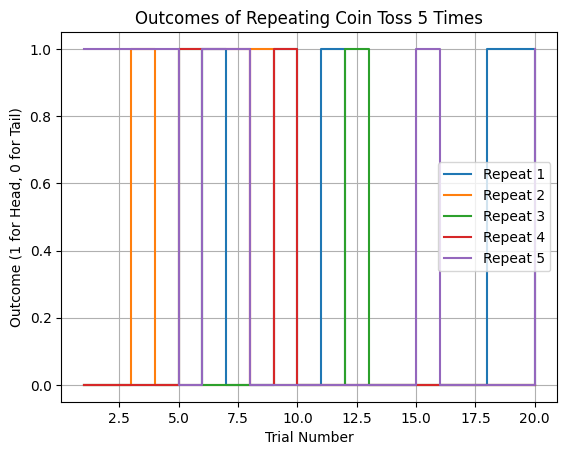

In [ ]:
# (b) Repeat the experiment 5 times and plot outcomes for each repeat against trial number
outcomes_b = experiment_repeats(randomNumGen)
plot_outcomes(outcomes_b, 'Outcomes of Repeating Coin Toss 5 Times')

The different colours here represent the outcomes for 5 different repetitions of the experiment where we do 20 independent bernoulli trials.

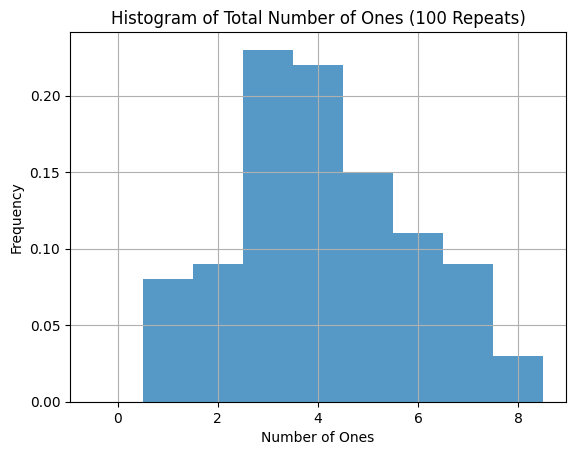

In [ ]:
# (c) Repeat the experiment 100 times and plot the histogram of total number of 1s
numRepeats_c = 100
outcomes_c = experiment_repeats(randomNumGen, numRepeats_c)
total_ones_c = calculate_total_ones(outcomes_c)
plot_histogram(total_ones_c, 'Frequency', 'Histogram of Total Number of Ones (100 Repeats)')

for 100 repetitions , the histogram has a higher frequency near the calculated mean (i.e n*p  in the case of a bernoulli RV) 0.2 x 20 = 4, compared to the other values representing the no. of ones/heads in 20 coin tosses. This graph closely gives an approximation of the binomial distribution.

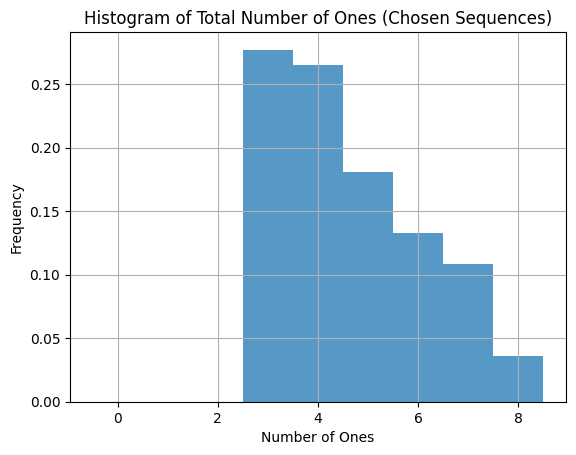

In [ ]:
# (d) Choose sequences that sum to at least 3 and plot the histogram of total number of 1s
chosen_outcomes_d = outcomes_c[np.sum(outcomes_c, axis=1) >= 3]
total_ones_d = calculate_total_ones(chosen_outcomes_d)
plot_histogram(total_ones_d, 'Frequency', 'Histogram of Total Number of Ones (Chosen Sequences)')

Since, for this experiment we are only considering the case where the sum of all outcomes have atleast been equal to the three. Obviously the the values lesser than 3 in the x-axis will will be removed, giving us a Truncated Binomial Distribution.

**The following is the code and explanation for Q2**


In [ ]:

# Generate random values of alpha from (0, 100)
#I have given seed of 1 here
rng = np.random.default_rng(1)
alpha_values = rng.uniform(0, 100, size=4)

numberOfExperiments = 100000

In [ ]:
# Simulate Poisson RVs
outcomesOfPoissonExperiments =[]
for alpha in alpha_values:
    outcomesOfPoissonExperiments.append(rng.poisson(lam=alpha, size=numberOfExperiments))

The above code is used to generate outcomes of Poisson distribution having for alpha value that is generated randomly between ,

In [ ]:
# Simulate Binomial RVs
listOfBinomialExps=[]
listofn =[]
for i,alpha in enumerate(alpha_values):
    n =int(np.ceil(10*alpha))  # Choose n to be as small as possible for a reasonable approximation
    p =alpha/n
    print(f"For alpha = {alpha:.2f}, n = {n}, p = {p:.4f}")
    outcomeOfBinomialExps = aBinomialExperiment(rng, binomialParam_n=n, binomialParam_p=p, profitLoss_Bern=[1, 0], numberOfBinomialExperiments=numberOfExperiments)
    listOfBinomialExps.append(outcomeOfBinomialExps)
    listofn.append(n)

For alpha = 51.18, n = 512, p = 0.1000
For alpha = 95.05, n = 951, p = 0.0999
For alpha = 14.42, n = 145, p = 0.0994
For alpha = 94.86, n = 949, p = 0.1000


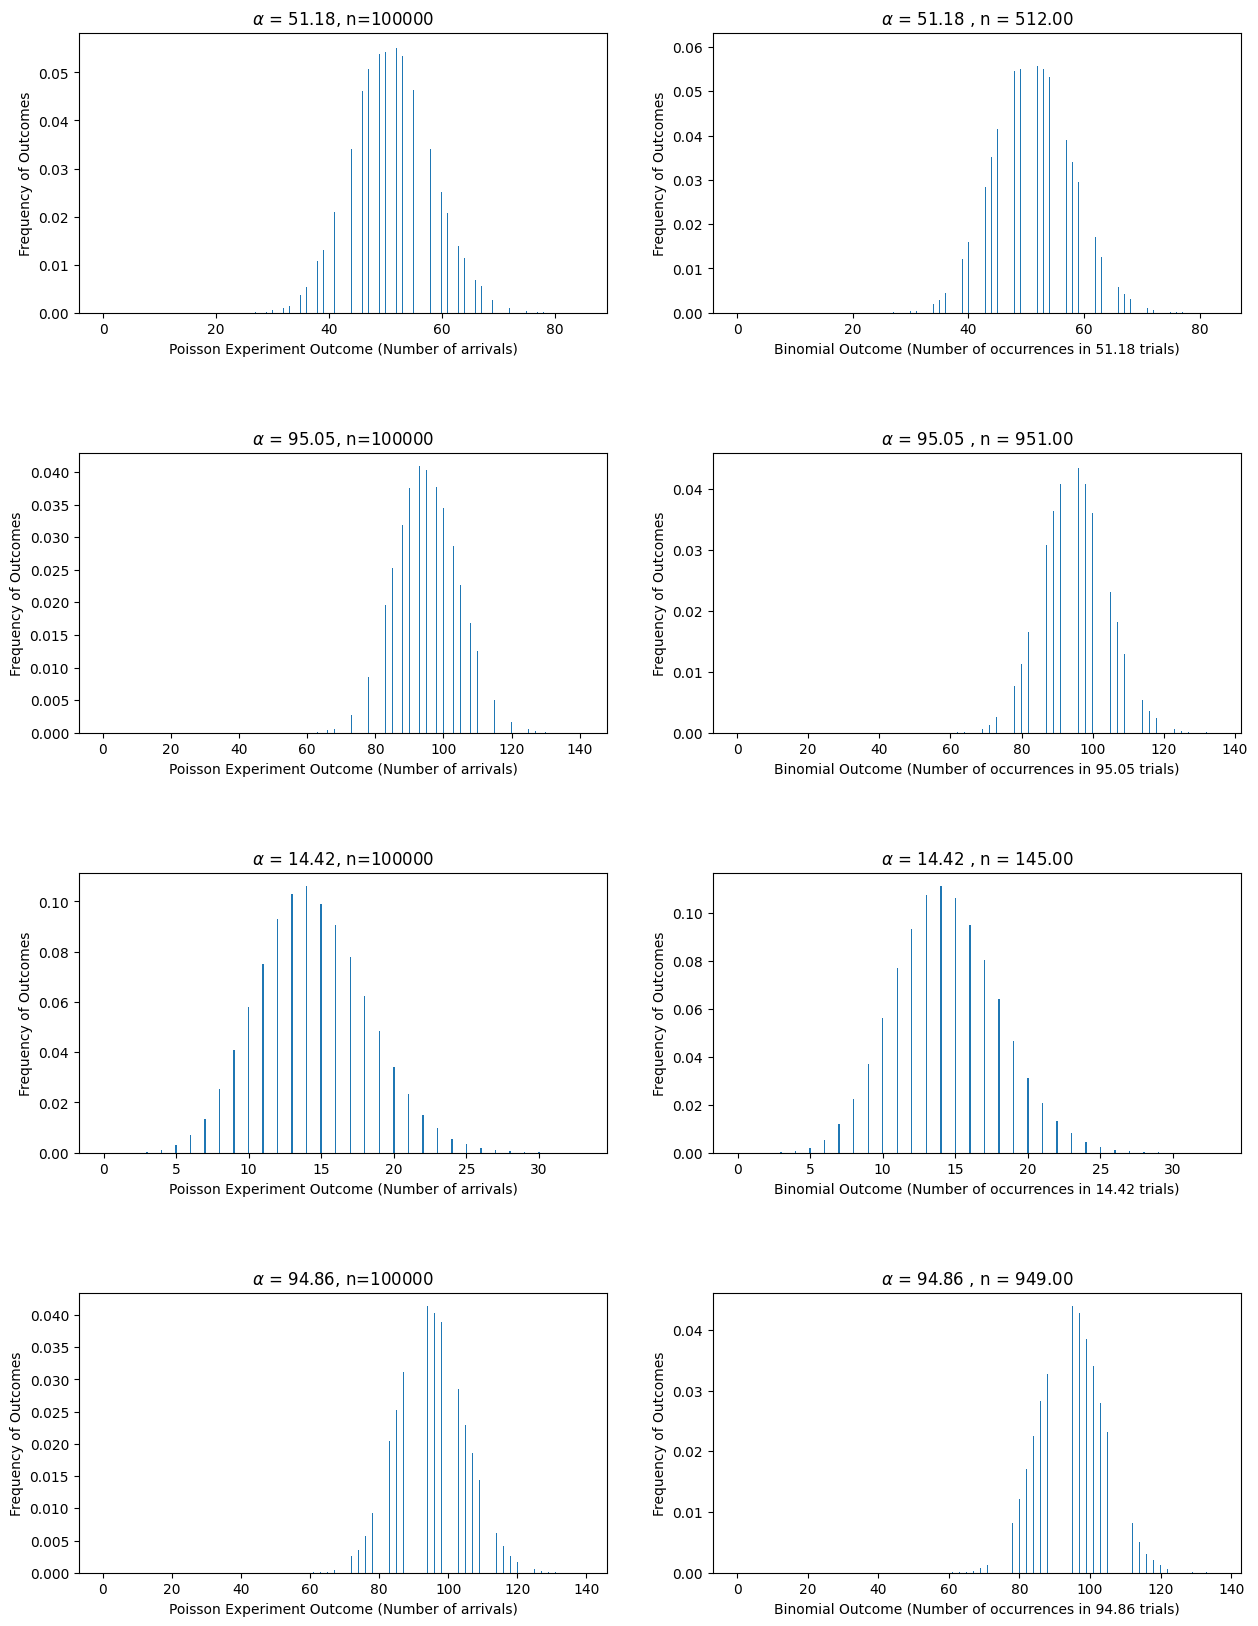

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20), sharex=False)
plt.subplots_adjust(hspace=0.5)

widthArr =[0.1, 0.1, 0.1, 0.1]

for row in range(4):
    for col in range(2):
        if col == 0:  # Poisson
            histVal = np.histogram(outcomesOfPoissonExperiments[row], bins=range(0, np.max(outcomesOfPoissonExperiments[row]) + 2), density=False)
            axs[row, col].set_xlabel("Poisson Experiment Outcome (Number of arrivals)")
            axs[row, col].set_title(f"$\\alpha$ = {alpha_values[row]:.2f}, n=100000")
        else:  # Binomial
            histVal = np.histogram(listOfBinomialExps[row], bins=range(0, int(np.max(listOfBinomialExps[row])) + 2), density=False)
            axs[row, col].set_xlabel(f"Binomial Outcome (Number of occurrences in {alpha_values[row]:.2f} trials)")
            axs[row, col].set_title(f"$\\alpha$ = {alpha_values[row]:.2f} , n = {listofn[row]:.2f}")

        axs[row, col].bar(histVal[1][:-1], histVal[0] / numberOfExperiments, width=widthArr[row])
        axs[row, col].set_xscale("linear")
        axs[row, col].set_ylabel("Frequency of Outcomes")

plt.show()

The value chosen for n has to be smallest that can approximate to a poisson poisson distribution, for eg. if i were to take the random value of alpha as:[51.18,95.05, 14.42 ,94.86] .
then after showing poisson of each alpha , if i want to show the binomial distribution , then i have to first calculate n, which will be n = ceil(10 * alpha), this will ensure that n is small, but still large enough to showcase the binomial distributuion well.
therfore, for these values of alpha , n would be [512, 951, 145, 949]. The histogram for these values of binomial(n,p) will approximate the poisson (alpha).

**The following is the code and explanation for Q3**

In [ ]:
# Generate random values of alpha from (1, 20)
rng = np.random.default_rng(8946729)
alpha_values = rng.uniform(1, 20, size=2)


In [ ]:
# Set the number of experiments to be divisible by the maximum sequence length
sequence_lengths = [5, 10,50, 100]  # Adjust these values
max_seq_len = max(sequence_lengths)
numberOfExperiments = 100000 - (100000 % max_seq_len)

In [ ]:
# Simulate Poisson RVs
outcomesOfPoissonExperiments = []
for alpha in alpha_values:
    outcomesOfPoissonExperiments.append(rng.poisson(lam=alpha, size=numberOfExperiments))

In [ ]:
# Simulate sums of Poisson RVs with increasing sequence lengths
sums_of_poisson_rvs=[]
for alpha, poisson_rvs in zip(alpha_values, outcomesOfPoissonExperiments):
    sums_per_alpha = []
    for seq_len in sequence_lengths:
        # Pad the poisson_rvs array with zeros to make the length divisible by seq_len
        padded_poisson_rvs = np.pad(poisson_rvs, (0, -len(poisson_rvs) % seq_len), mode='constant')
        sums = np.sum(padded_poisson_rvs.reshape(-1, seq_len), axis=1)
        sums_per_alpha.append(sums)
    sums_of_poisson_rvs.append(sums_per_alpha)

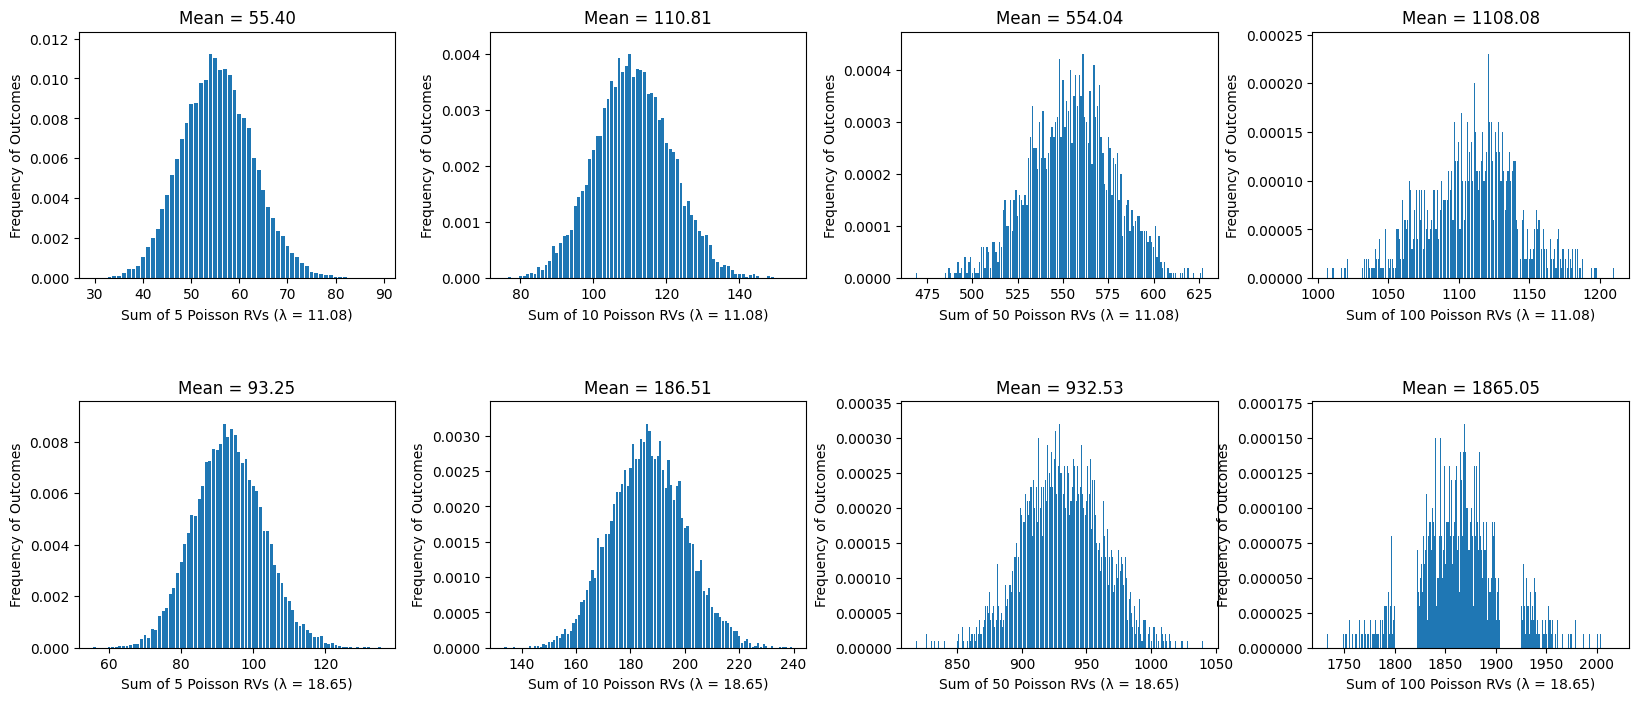

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 8), sharex=False, sharey=False)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for row in range(2):
    for col in range(4):
        alpha = alpha_values[row]
        seq_len = sequence_lengths[col]
        sums = sums_of_poisson_rvs[row][col]

        histVal = np.histogram(sums, bins=range(np.min(sums), np.max(sums) + 2), density=False)

        # Set the y-axis limit based on the maximum frequency of outcomes
        ymax = np.max(histVal[0] / numberOfExperiments) * 1.1  # Add 10% buffer
        axs[row, col].set_ylim(0, ymax)

        axs[row, col].bar(histVal[1][:-1], histVal[0] / numberOfExperiments, width=0.8)
        axs[row, col].set_xlabel(f"Sum of {seq_len} Poisson RVs (λ = {alpha:.2f})")
        axs[row, col].set_ylabel("Frequency of Outcomes")
        axs[row, col].set_title(f"Mean = {seq_len * alpha:.2f}")

plt.show()

the law of large numbers states that as the number of trials or observations increases, the sample mean converges to the population mean. Mathematically, ifare iid random variables with mean μ, then the sample mean n approaches infinity.in our case, we're summing iid Poisson RVs. The Poisson distribution has a single parameter λ, which represents the mean and variance of the distribution. as we sum more iid poisson RVs, the sum tends to concentrate around nxλ, which is the expected value of the sum.By illustrating the sums of iid poisson RVs over an increasing sequence of the number of RVs being added, we should observe the convergence of the sample mean to the population mean and the emergence of a bell-shaped curve resembling the normal distribution. this demonstrates the statistical principles of convergence and distributional approximation described by the law of large numbers and Central Limit Theorem, respectively.







